# Кластеризация: Метод k-средних
Кластерный анализ – это способ группировки многомерных объектов, основанный на представлении результатов отдельных наблюдений точками подходящего геометрического пространства с последующим выделением групп как «сгустков» этих точек (кластеров, таксонов). Задачей такого разделения на группы является ухватить естественную структуру данных и абстрагироваться от индивидуальных характеристик каждого объекта к более общим признакам, которые объединяют эти объекты в кластеры. Например, кластеризация документов по их содержимому или кластеризация покупателей по их потребительской корзине и т.д. Так как заранее не известно по каким признакам следует объединять объекты в кластеры, то кластерный анализ относят к методам обучения без учителя (unsupervised learning).
Одним из наиболее простых и распространенных алгоритмов кластеризации является алгоритм k-средних (k-means), в котором каждый кластер представлен его центром (центроидом).

"K" означает число кластеров. Число кластеров не определяется автоматически и в каждом кластере может быть разное число объектов;
k-средних использует двух шаговый эвристический подход к группированию похожих объектов: шаг присваивания и шаг обновления;
схожесть (похожесть) объектов измеряется с помощью функции дистанции.

# Алгоритм k-средних
k-средних можно описать следующими 4-мя шагами:
1. Выбрать k объектов как начальные центроиды.
2. Отнести остальные объекты к ближайшим центроидам.
3. Произвести перерасчет центроидов.
4. Повторять шаги 2 и 3 до тех пор, пока центроиды не перестанут «двигаться».

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt


def distance(v1, v2, ax=1):
    return np.linalg.norm(v1 - v2, axis=ax)

class KMeans:
    def __init__(self, n_clusters, max_iter=500):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        n_samples = len(X)
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        centroids_old = np.zeros(centroids.shape)
        clusters = np.zeros(n_samples)

        while True:
            for i in range(n_samples):
                distances = distance(X[i,], centroids)
                clusters[i] = distances.argmin()
            centroids_old = deepcopy(centroids)
            
            for k in range(self.n_clusters):
                centroids[k] = X[clusters == k,].mean(axis=0)
            error = distance(centroids, centroids_old, None)
            
            if (error >= 0) and (error <= 0.01):
                self.clusters = clusters.astype("int")
                self.centroids = centroids
                break

    def predict(self, y):
        y_unique = np.unique(y)
        y_unique_num = [i for i in range(len(np.unique(y)))]
        n_samples = len(X)
        clusters = np.zeros(n_samples)
        
        for k in range(n_samples):
            for j in range(self.n_clusters):
                if y[k][0] == y_unique[j]:
                    y[k] = y_unique_num[j]
            clusters[k] = y[k]
        
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        centroids_old = np.zeros(centroids.shape)
        
        while True:
            centroids_old = deepcopy(centroids)
            error = distance(centroids, centroids_old, None)
            
            if error == 0:
                self.clusters = clusters.astype(int)
                self.centroids = centroids
        
        return self.centroids, self.clusters

Для обучения модели будем использовать хорошо известный набор данных с лепестками цветов ириса:

In [2]:
df = pd.read_csv('iris.csv')
X = df.loc[:, df.columns != "Name"].as_matrix()
model = KMeans(3)
model.fit(X)
clusters = model.clusters

c:\users\orl\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2])

In [4]:
plt.figure(figsize=(14, 7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [5]:
# Create a colormap
colormap = np.array(["red", "lime", "black"])

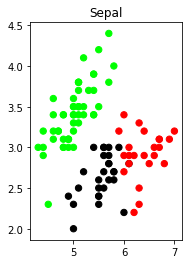

In [6]:
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(df.SepalLength, df.SepalWidth, c=colormap[clusters], s=40)
plt.title("Sepal")
plt.show()

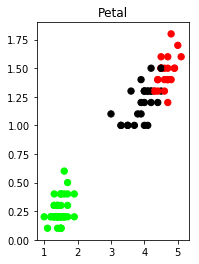

In [7]:
# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(df.PetalLength, df.PetalWidth, c=colormap[clusters], s=40)
plt.title("Petal")
plt.show()